# **Tugas Statistika Regresi B**

# Nama Kelompok :
1. Larasati (22083010018)
2. Desi Tristianti (22083010037)

In [68]:
import pandas as pd

df = pd.read_csv("C:/Users/Larasati/Downloads/Data tabel 9 csv.csv")
df

,Biaya iklan ($ thousand),Jumlah Produk terjual (million)
0,587,564
1,781,571
2,937,583
3,988,593
4,441,531
5,451,533
6,498,537
7,508,544
8,526,547
9,530,548


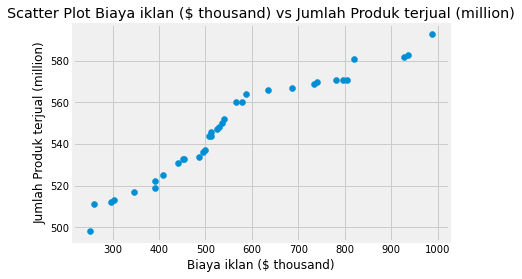

In [69]:
#Menampilkan Scatter Plot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = df[['Biaya iklan ($ thousand)']]
y = df['Jumlah Produk terjual (million)']

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Untuk memunculkan Scatter Plot
plt.scatter(x,y)
plt.xlabel('Biaya iklan ($ thousand)')
plt.ylabel('Jumlah Produk terjual (million)')
plt.title('Scatter Plot Biaya iklan ($ thousand) vs Jumlah Produk terjual (million)')
plt.show()

In [70]:
#Memodelkan dengan Regresi Linier Sederhana

import statsmodels.api as sm

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                                   OLS Regression Results                                  
Dep. Variable:     Jumlah Produk terjual (million)   R-squared:                       0.932
Model:                                         OLS   Adj. R-squared:                  0.930
Method:                              Least Squares   F-statistic:                     455.0
Date:                             Mon, 18 Sep 2023   Prob (F-statistic):           7.08e-21
Time:                                     16:16:05   Log-Likelihood:                -113.51
No. Observations:                               35   AIC:                             231.0
Df Residuals:                                   33   BIC:                             234.1
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                               coef    std err          t      P>|t|      [0.025

In [71]:
#Prediksi y
prediksi = model.predict(x)
print(prediksi.head())

0    550.259675
1    573.560516
2    592.297275
3    598.422753
4    532.723991
dtype: float64


In [72]:
#Residual e i
residual=model.resid
print(residual.head())

0    13.740325
1    -2.560516
2    -9.297275
3    -5.422753
4    -1.723991
dtype: float64


# **Uji F**

In [73]:
# Pisahkan variabel independen (X) dan variabel dependen (y)

from sklearn.feature_selection import f_regression

x = df['Biaya iklan ($ thousand)'].values.reshape(-1, 1)
y = df['Jumlah Produk terjual (million)']

# Buat model regresi linear
regressor = LinearRegression()
regressor.fit(x, y)

# Hitung uji F
f_statistic, p_value = f_regression(x, y)

print(f"Nilai F-statistic: {f_statistic[0]}")
print(f"Nilai p-value: {p_value[0]}")

# Ambang batas signifikansi
alpha = 0.05

if p_value[0] < alpha:
    print("Biaya iklan berpengaruh signifikan terhadap jumlah produk terjual. Tolak Hipotesis Nol")
else:
    print("Biaya iklan tidak berpengaruh signifikan terhadap jumlah produk terjual. Gagal Tolak Hipotesis Nol")


Nilai F-statistic: 455.0008608114662
Nilai p-value: 7.083409440789599e-21
Biaya iklan berpengaruh signifikan terhadap jumlah produk terjual. Tolak Hipotesis Nol


# **R - Squared**

In [74]:
x = df['Biaya iklan ($ thousand)']
y = df['Jumlah Produk terjual (million)']

# Hitung rata-rata dari masing-masing variabel
mean_x = np.mean(x)
mean_y = np.mean(y)

# Hitung varians dari masing-masing variabel
variance_x = np.var(x, ddof=1)
variance_y = np.var(y, ddof=1)

# Hitung kovarians antara Biaya Iklan dan Jumlah Produk terjual
covariance = np.cov(x, y, ddof=1)[0, 1]

# Hitung koefisien determinasi (R-squared)
r_squared = (covariance / (np.sqrt(variance_x) * np.sqrt(variance_y)))**2

print("R-squared:", r_squared)


R-squared: 0.9323771684641607


R-squared mendekati 1, itu berarti bahwa biaya iklan berpengaruh baik dalam penjualan produk

# **Uji T**

In [75]:
from scipy import stats

# Melakukan uji t-student
t_statistic, p_value = stats.ttest_ind(x,y)

# Menampilkan hasil uji t-student
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Menentukan apakah perbedaan signifikan
alpha = 0.05  # Ambil tingkat signifikansi yang diinginkan
if p_value < alpha:
    print("Perbedaan signifikan, tolak hipotesis nol")
else:
    print("Tidak ada perbedaan signifikan, gagal tolak hipotesis nol")

T-Statistic: 0.48321559032716577
P-Value: 0.6304949132144901
Tidak ada perbedaan signifikan, gagal tolak hipotesis nol


# **Plot QQ**

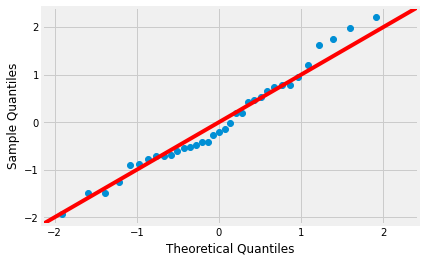

In [76]:
fig = sm.qqplot(residual, stats.t, fit=True, line="45")
plt.show()

Titik titik dalam Plot Q-Q tersebut mendekati garis 45 derajat dan mengikuti pola garis tersebut dengan baik artinya residual cukup mendekati distribusi normal

# **Autokorelasi**

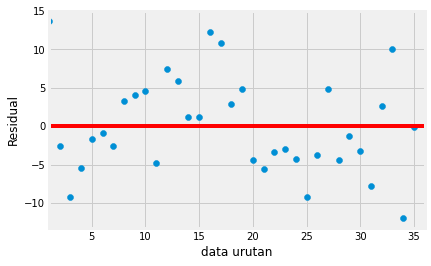

In [77]:
#Plot memeriksa asumsi residual autokorelasi
data_urutan=pd.Series(range(1,36))
plt.scatter(data_urutan, residual);
plt.axhline(0, color='red')
plt.xlabel('data urutan');
plt.ylabel('Residual');
plt.xlim([1,36]);

Titik titik residual tersebar secara acak di sekitar garis merah tanpa pola yang jelas artinya bahwa tidak adanya autokorelasi yang signifikan dalam data residual tersebut

# **Heteroskedastisitas**

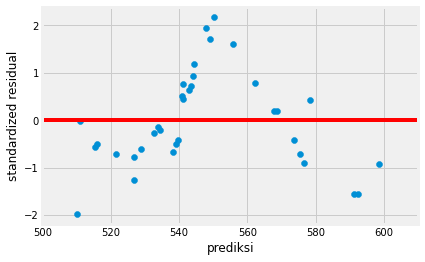

In [78]:
#Plot memeriksa asumsi residual heteroskedastisitas
influence = model.get_influence()

#menentukan standard residualnya
std_residual = influence.resid_studentized_internal
plt.scatter(prediksi, std_residual);
plt.axhline(0, color='red')
plt.xlabel('prediksi');
plt.ylabel('standardized residual');
plt.xlim([500,610]);
plt.show()

Titik titik residual tersebar secara acak di sekitar garis merah tanpa pola yang jelas artinya bahwa tidak adanya heteroskedastisitas yang signifikan dalam data residual tersebut

# **Uji Jarque-Bera**

In [79]:
#Pengujian JarqueBera untuk memeriksa asumsi residual

from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(model.resid)
lzip(name, test)

[('Jarque-Bera', 1.1084234888483664),
 ('Chi^2 two-tail prob.', 0.5745249552531131),
 ('Skew', 0.3765341006018151),
 ('Kurtosis', 2.560739137572532)]

# **Uji Durbin-Watson**

In [80]:
#Pengujian Durbin-Watson

from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(model.resid)
print(f"Durbin-Watson: {dw}")

Durbin-Watson: 1.4684302824383635


# **Uji Breush-Pagan**

In [81]:
#Pengujian Breush-Pagan

names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 0.254209734538382),
 ('p-value', 0.6141263489657269),
 ('f-value', 0.2414370539761613),
 ('f p-value', 0.626422416599357)]

# **Kesimpulan**

Uji F dan T signifikan, dan R-squared tinggi, ini menunjukkan bahwa model regresi secara keseluruhan baik dan variabel independen memiliki pengaruh signifikan pada variabel dependen. Data tersebut tidak menyebabkan terjadinya autokorelasi atau heteroskedastisitas dalam residu, hal ini mengindikasikan bahwa model regresi yang digunakan cocok dengan data dengan baik, dan hasil analisis regresi dapat dianggap lebih dapat diandalkan.